In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
#Function
# Finds the mean of the nonzero values in a column, then replaces all zeros in that column with the mean value.

def zero_to_mean(dataset,numcol): 
    
    dataLen = len(dataset)
    headers = dataset.columns
    
    for k in range(numcol):
        mean = num = sum1 = 0
        for i in range(dataLen):
            if diabetes.values[i,k] > 0:
                sum1 = sum1 + diabetes.values[i,k]
                num = num + 1
        mean = sum1/num
        diabetes[headers[k]] = diabetes[headers[k]].replace([0],mean)
        print("Mean", k,",",mean)

In [3]:
diabetes = pd.read_csv('diabetes.csv') 
diabetes.head(10)  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Data Addition
# The function zero_to_mean takes in a dataset, and number of columns to operate on.

zero_to_mean(diabetes,8)

Mean 0 , 4.494672754946728
Mean 1 , 121.6867627785059
Mean 2 , 72.40518417462484
Mean 3 , 29.153419593345657
Mean 4 , 155.5482233502538
Mean 5 , 32.45746367239099
Mean 6 , 0.4718763020833327
Mean 7 , 33.240885416666664


In [5]:
diabetes.head(10)  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [6]:
# use bivariate correlation to find correlation between each parameter 
corr = diabetes.corr(method='pearson') 
# print(corr[:5])

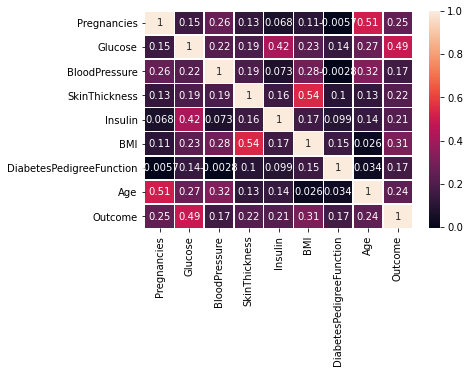

In [7]:
ax = sns.heatmap(corr, annot=True,linewidths=.5,xticklabels=corr.columns,yticklabels=corr.columns)

In [8]:
################################# Problem 1 #################################

In [9]:
# Using all labels in my training. It seems to work best this way 

X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = diabetes.iloc[:, 8].values 

In [10]:
# Train and Test Split

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) 

In [11]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler 
#sc_X = StandardScaler() 
sc_X = MinMaxScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [12]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test) 
Y_pred[0:9] 

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [13]:
# Confusion Matrix, Logistic Regression

from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
# cnf_matrix 

In [14]:
#Accuracy, Precision, Recall for Logistic Regression

from sklearn import metrics 
print("Accuracy: ",round(metrics.accuracy_score(Y_test, Y_pred)*100,2),"%")
print("Precision:",round(metrics.precision_score(Y_test, Y_pred)*100,2),"%") 
print("Recall:",round(metrics.recall_score(Y_test, Y_pred)*100,2),"%") 

Accuracy:  79.69 %
Precision: 76.74 %
Recall: 53.23 %


Text(0.5, 257.44, 'Predicted label')

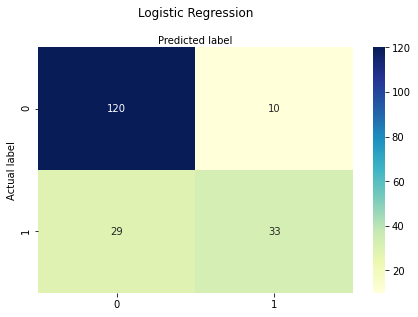

In [15]:
# Confusion Matrix Heatmap

import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [16]:
# This section is supposed to be for drawing a color map for the logistic regression. Not entirely sure how this works.
# plt.countourf produces a warning and I am not entirely sure why

#import warnings
# from matplotlib.colors import ListedColormap
# warnings.filterwarnings('ignore') 
# x_set, y_set = X_test, Y_test
# x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1, step =0.01), np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1, step =0.01))
# plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(x1.min(), x1.max())
# plt.ylim(x1.min(), x2.max())
# for i,j in enumerate(np.unique(y_set)):
#     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
#     c = ListedColormap(('yellow', 'blue'))(i),label = j)
# plt.title('Logistic Regression (Test set)') 
# plt.xlabel('Age') 
# plt.ylabel('Estimated Salary')
# plt.show()
# print(x1.shape)
# print(x2.shape)

In [17]:
################################# Problem 2 #################################

In [18]:
# Naive Gaussian Bayes 

from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 


diabetes = pd.read_csv('diabetes.csv') 
zero_to_mean(diabetes,8)
diabetes.head(10)  

Mean 0 , 4.494672754946728
Mean 1 , 121.6867627785059
Mean 2 , 72.40518417462484
Mean 3 , 29.153419593345657
Mean 4 , 155.5482233502538
Mean 5 , 32.45746367239099
Mean 6 , 0.4718763020833327
Mean 7 , 33.240885416666664


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [19]:
# Using all labels in my training. It seems to work best this way 

X = diabetes.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = diabetes.iloc[:, 8].values 

In [20]:
# Train and Test Split

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) 

In [21]:
classifier.fit(X_train, Y_train) 
Y2_pred  =  classifier.predict(X_test) 

In [22]:
# Confusion Matrix, Naive Gaussian Bayes

cm = confusion_matrix(Y_test, Y2_pred) 

In [23]:
#Accuracy, Precision, Recall for Naive Gaussian Bayes

ac = metrics.accuracy_score(Y_test, Y2_pred) 

print("Accuracy: ",round(ac*100,2),"%")
print("Precision:",round(metrics.precision_score(Y_test, Y2_pred)*100,2),"%") 
print("Recall:",round(metrics.recall_score(Y_test, Y2_pred)*100,2),"%") 

Accuracy:  76.56 %
Precision: 66.04 %
Recall: 56.45 %


Text(0.5, 257.44, 'Predicted label')

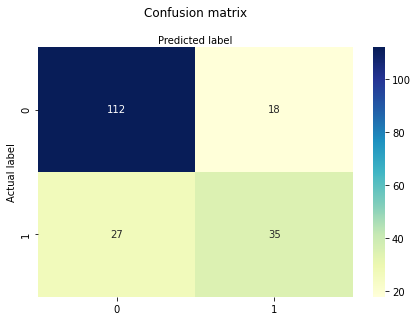

In [24]:
# Confusion Matrix Heatmap

class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') # cnf matrix?
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [22]:
################################# Problem 3 #################################

In [23]:
# K-Fold Cross-Validation

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

def evaluate_model(X, y, repeats, splits):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=splits, n_repeats=repeats, random_state=1)
    # create model
    model = LogisticRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>1 mean=0.7526 se=0.014
>2 mean=0.7604 se=0.009
>3 mean=0.7665 se=0.009
>4 mean=0.7643 se=0.007
>5 mean=0.7649 se=0.006
>6 mean=0.7630 se=0.006
>7 mean=0.7645 se=0.005
>8 mean=0.7655 se=0.005
>9 mean=0.7664 se=0.004
>10 mean=0.7675 se=0.004
>11 mean=0.7678 se=0.004
>12 mean=0.7679 se=0.004
>13 mean=0.7673 se=0.004
>14 mean=0.7668 se=0.004
>15 mean=0.7662 se=0.003


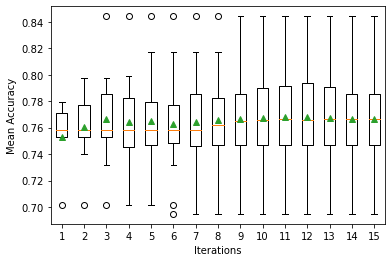

In [24]:
# Perform repeated K-fold cross_validation, 5 folds
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, Y, r, 5)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
    
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('Mean Accuracy') 
plt.xlabel('Iterations') 
pyplot.show()

>1 mean=0.7565 se=0.017
>2 mean=0.7650 se=0.011
>3 mean=0.7643 se=0.009
>4 mean=0.7656 se=0.008
>5 mean=0.7672 se=0.007
>6 mean=0.7680 se=0.006
>7 mean=0.7679 se=0.006
>8 mean=0.7677 se=0.005
>9 mean=0.7668 se=0.005
>10 mean=0.7673 se=0.005
>11 mean=0.7667 se=0.005
>12 mean=0.7665 se=0.005
>13 mean=0.7660 se=0.004
>14 mean=0.7660 se=0.004
>15 mean=0.7657 se=0.004


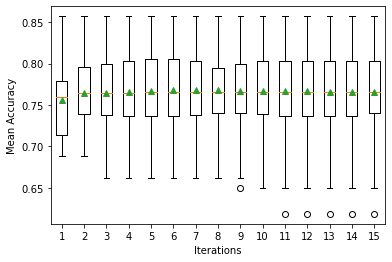

In [25]:
# Perform repeated K-fold cross_validation, 10 folds

repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, Y, r, 10)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
    
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.ylabel('Mean Accuracy') 
plt.xlabel('Iterations') 
pyplot.show()

In [26]:
################################# Problem 4 #################################

In [27]:
# Using Naive Bayes with k-fold cross-validation does not make sense. The result will 
# just be K datasets, each with different evaluation metrics.